In [1]:
import json
import os

In [2]:
pip install openai-whisper pypub pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install ffmpeg-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
import whisper

In [3]:
model = whisper.load_model("base")

In [4]:
audio_dir = r"C:\Users\TOMI\Documents\customer_personality_profiling\data\raw\caller"

In [5]:
output_data = []

In [ ]:
count = 0
for filename in os.listdir(audio_dir):
    if filename.endswith(".wav"):
        count +=1
        filepath = os.path.join(audio_dir, filename)
        print(f"Transcribing {filename}, {count}")

        result = model.transcribe(filepath, fp16=False)
        text = result['text']

        output_data.append({"file name": filename, "transcript": text})

Transcribing 0002f70f7386445b.wav, 1
Transcribing 004860b1ab2e4c88.wav, 2
Transcribing 0091a706bc604188.wav, 3
Transcribing 00d676d7058c49bb.wav, 4
Transcribing 00f7dce6fc3849a2.wav, 5
Transcribing 010d38f5ada54e0d.wav, 6
Transcribing 010eaccb7a23436f.wav, 7
Transcribing 0126ffdce48049a9.wav, 8
Transcribing 0188295665114e74.wav, 9
Transcribing 01cefd6f5c044a6f.wav, 10
Transcribing 01f7ec3700424bc0.wav, 11
Transcribing 020e48edcf0940a4.wav, 12
Transcribing 021cd80ca7cc464b.wav, 13
Transcribing 0224c92b64d144d4.wav, 14
Transcribing 02b03e407894474b.wav, 15
Transcribing 02e41649e7c441fd.wav, 16
Transcribing 02fd023b18d246d0.wav, 17
Transcribing 0317f95f3d7441c5.wav, 18
Transcribing 034a32d3b6e4435a.wav, 19
Transcribing 035edd1d09c1433e.wav, 20
Transcribing 0377245f73a54480.wav, 21
Transcribing 0395f6997a8e4836.wav, 22
Transcribing 03a17cc36d474151.wav, 23
Transcribing 03aad8e17c8d4d81.wav, 24
Transcribing 03df1bec638a46e6.wav, 25
Transcribing 03fccf2cf2254435.wav, 26
Transcribing 040f4938

In [7]:
import pandas as pd

In [8]:
df = pd.DataFrame(output_data)
df.to_csv("transcripted.csv", index=False)
print("DONE")

DONE


In [15]:
pip install pandas numpy regex unidecode rapidfuzz pyarrow

Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [ ]:
'''Download NLTK resources (only first time)
nltk.download('stopwords')
nltk.download('wordnet')'''

In [10]:
# Load your CSV
df = pd.read_csv("transcripted.csv")

# Initialize tools
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)  # remove punctuation & numbers
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(tokens)

In [11]:
df["cleaned"] = df["transcript"].apply(clean_text)
df.to_csv("transcript_cleaned.csv", index=False)

print("✅ Preprocessing complete. Saved as transcript_cleaned.csv")
print(df[['file name', 'cleaned']].head())

✅ Preprocessing complete. Saved as transcript_cleaned.csv
               file name                                            cleaned
0  call_recording_01.wav  hello im sarah miller im calling inquire ac ai...
1  call_recording_02.wav  extremely dissatisfied recent order john davis...
2  call_recording_03.wav  hi maria rodriguez im trouble lap laptop order...
3  call_recording_04.wav  wanted call say pleased dw dishwasher purchase...
4  call_recording_05.wav  hello name jessica brown id like place order w...


In [12]:
# Load your transcribed dataset
df = pd.read_csv("transcript_cleaned.csv")

# ✅ Add new column with empty strings
df["sentiment"] = ""

# ✅ Save it back to CSV
df.to_csv("customer_profile.csv", index=False)

print("New file saved: customer_profile.csv")
print(df.head())

New file saved: customer_profile.csv
               file name                                         transcript  \
0  call_recording_01.wav   Hello, I'm Sarah Miller. I'm calling to inqui...   
1  call_recording_02.wav   I am extremely dissatisfied with my recent or...   
2  call_recording_03.wav   Hi, this is Maria Rodriguez. I'm having troub...   
3  call_recording_04.wav   I just wanted to call and say how pleased I a...   
4  call_recording_05.wav   Hello, my name is Jessica Brown. I'd like to ...   

                                             cleaned sentiment  
0  hello im sarah miller im calling inquire ac ai...            
1  extremely dissatisfied recent order john davis...            
2  hi maria rodriguez im trouble lap laptop order...            
3  wanted call say pleased dw dishwasher purchase...            
4  hello name jessica brown id like place order w...            


In [20]:
import pandas as pd
print(df.columns)
# Load your dataset
df = pd.read_excel("customer_profile.csv")

print(df.head())
print(df['sentiment'].value_counts())  # check label distribution


Index(['file name', 'transcript', 'cleaned', 'sentiment'], dtype='object')
               file name                                         transcript  \
0  call_recording_01.wav   Hello, I'm Sarah Miller. I'm calling to inqui...   
1  call_recording_02.wav   I am extremely dissatisfied with my recent or...   
2  call_recording_03.wav   Hi, this is Maria Rodriguez. I'm having troub...   
3  call_recording_04.wav   I just wanted to call and say how pleased I a...   
4  call_recording_05.wav   Hello, my name is Jessica Brown. I'd like to ...   

                                             cleaned   sentiment  
0  hello im sarah miller im calling inquire ac ai...     neutral  
1  extremely dissatisfied recent order john davis...       angry  
2  hi maria rodriguez im trouble lap laptop order...  frustrated  
3  wanted call say pleased dw dishwasher purchase...    friendly  
4  hello name jessica brown id like place order w...     neutral  
sentiment
friendly      8
neutral       6
frustr

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

X = df['transcript']  # features
y = df['sentiment'] # labels

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# TF-IDF
vectorizer = TfidfVectorizer(stop_words="english", max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [23]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, class_weight="balanced")
model.fit(X_train_vec, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

C:\Users\TOMI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\TOMI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\TOMI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\TOMI\anaconda3\Lib\site-packages\sklearn\m

              precision    recall  f1-score   support

       angry       0.00      0.00      0.00         0
    friendly       1.00      0.50      0.67         2
  frustrated       0.00      0.00      0.00         1
     neutral       0.50      1.00      0.67         1

    accuracy                           0.50         4
   macro avg       0.38      0.38      0.33         4
weighted avg       0.62      0.50      0.50         4



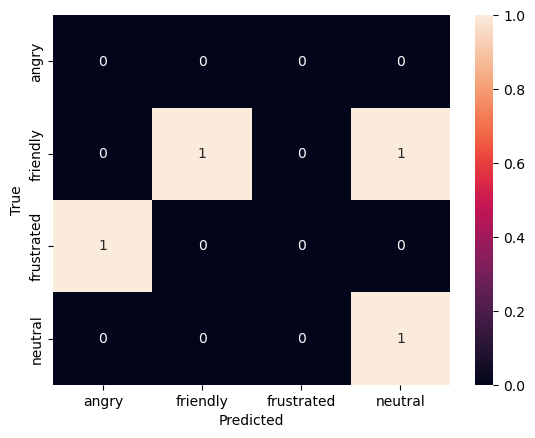

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test_vec)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
sns.heatmap(cm, annot=True, fmt="d", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [25]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.50

Classification Report:
              precision    recall  f1-score   support

       angry       0.00      0.00      0.00         0
    friendly       1.00      0.50      0.67         2
  frustrated       0.00      0.00      0.00         1
     neutral       0.50      1.00      0.67         1

    accuracy                           0.50         4
   macro avg       0.38      0.38      0.33         4
weighted avg       0.62      0.50      0.50         4



C:\Users\TOMI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\TOMI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\TOMI\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\TOMI\anaconda3\Lib\site-packages\sklearn\m

In [25]:
import os

# Check current working directory
print("Current Directory:", os.getcwd())

# Save file to this directory
output_path = os.path.join(os.getcwd(), "customer_profile.csv")
df.to_csv(output_path, index=False)
print(f"✅ Preprocessed file saved at: {output_path}")

Current Directory: C:\Users\TOMI\Documents\callcentre_profiling\notebook
✅ Preprocessed file saved at: C:\Users\TOMI\Documents\callcentre_profiling\notebook\customer_profile.csv


In [22]:
pip install sentence-transformers

Note: you may need to restart the kernel to use updated packages.


In [27]:
from sentence_transformers import SentenceTransformer
import pandas as pd

# Load preprocessed data
df = pd.read_csv("transcript_cleaned.csv")

# Load sentence transformer model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Generate embeddings
embeddings = model.encode(df['cleaned'], show_progress_bar=True)

print("✅ Embeddings shape:", embeddings.shape)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

✅ Embeddings shape: (20, 384)


In [ ]:
import pandas as pd
import numpy as np

# Load your preprocessed CSV
df = pd.read_csv("transcript_cleaned.csv")  # Update with your file

# Define 5 personality categories
categories = ["short-tempered", "cooperative", "neutral", "reserved", "friendly"]

# Randomly assign a category to each transcript
np.random.seed(42)  # For reproducibility
df['personality'] = np.random.choice(categories, size=len(df))

# Save the updated file
df.to_csv("conversation_with_labels.csv", index=False)

print("✅ Added personality labels. Here's a preview:")
print(df.head())

In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# 1. Load labeled dataset
df = pd.read_csv("conversation_with_labels.csv")

# 2. Features (text) & Labels (personality)
X = df['cleaned_text']
y = df['personality']

# 3. Split into Train & Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 4. Convert text → numerical features (TF-IDF)
vectorizer = TfidfVectorizer(max_features=3000, ngram_range=(1,2))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# 5. Train classifier (Logistic Regression)
clf = LogisticRegression(max_iter=200, class_weight="balanced")
clf.fit(X_train_vec, y_train)

# 6. Evaluate
y_pred = clf.predict(X_test_vec)

print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

✅ Accuracy: 0.23684210526315788

Classification Report:
                 precision    recall  f1-score   support

   cooperative       0.36      0.57      0.44         7
      friendly       0.00      0.00      0.00         7
       neutral       0.17      0.14      0.15         7
      reserved       0.22      0.22      0.22         9
short-tempered       0.25      0.25      0.25         8

      accuracy                           0.24        38
     macro avg       0.20      0.24      0.21        38
  weighted avg       0.20      0.24      0.22        38



In [44]:
import joblib

# Save model and vectorizer
joblib.dump(clf, "personality_model.pkl")
joblib.dump(vectorizer, "vectorizer.pkl")
print("✅ Model & Vectorizer saved!")

# Load them later
clf_loaded = joblib.load("personality_model.pkl")
vectorizer_loaded = joblib.load("vectorizer.pkl")

# Example prediction
sample_text = ["I need help with my account, it's really frustrating!"]
sample_vec = vectorizer_loaded.transform(sample_text)
print("Predicted personality:", clf_loaded.predict(sample_vec)[0])


✅ Model & Vectorizer saved!
Predicted personality: reserved


In [45]:
from sentence_transformers import SentenceTransformer
import pandas as pd

# Load your dataset with labels
df = pd.read_csv("conversation_with_labels.csv")

# Load pretrained sentence embedding model
model = SentenceTransformer("all-MiniLM-L6-v2")

# Encode cleaned_text column into embeddings
embeddings = model.encode(df["cleaned_text"].tolist(), show_progress_bar=True)

print("✅ Embeddings shape:", embeddings.shape)  # (num_samples, embedding_dim)


Batches:   0%|          | 0/6 [00:00<?, ?it/s]

✅ Embeddings shape: (186, 384)


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    embeddings, df["personality"], test_size=0.2, random_state=42
)

# Train classifier
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Evaluate
y_pred = clf.predict(X_test)
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

✅ Accuracy: 0.15789473684210525
                precision    recall  f1-score   support

   cooperative       0.17      0.17      0.17         6
      friendly       0.00      0.00      0.00         6
       neutral       0.20      0.17      0.18         6
      reserved       0.24      0.40      0.30        10
short-tempered       0.00      0.00      0.00        10

      accuracy                           0.16        38
     macro avg       0.12      0.15      0.13        38
  weighted avg       0.12      0.16      0.13        38



In [48]:
import pandas as pd

df = pd.read_csv("conversation_with_labels.csv")

# Remove old random labels if any
if "personality" in df.columns:
    df = df.drop(columns=["personality"])

# Add empty personality column
df["personality"] = ""

df.to_csv("new_conversation_for_labeling.csv", index=False)
print("✅ Ready for manual labeling: new_conversation_for_labeling.csv")


✅ Ready for manual labeling: new_conversation_for_labeling.csv
